In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
# Load training and eval data
((train_data, train_labels),
 (eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()

In [8]:
type(train_labels)

numpy.ndarray

In [10]:
train_labels.shape

(60000,)

In [11]:
train_data.shape

(60000, 28, 28)

In [14]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [15]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  

eval_data = eval_data/np.float32(255)
eval_labels = eval_labels.astype(np.int32)  

In [16]:
type(train_labels)

numpy.ndarray

In [17]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

Text(0.5, 1.0, '2')

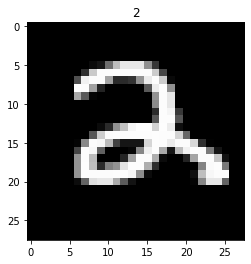

In [18]:
idx = np.random.randint(0,len(train_data))
plt.imshow(train_data[idx], cmap='gray')
plt.title(str(train_labels[idx]))

In [19]:
feature_columns = [tf.feature_column.numeric_column("x", shape=[28, 28])]

In [20]:
classifier = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    n_classes=10,
    model_dir="mnist_model/"
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'mnist_model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002156E4F5C88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
train_input_fn =  tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True)

In [28]:
classifier.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mnist_model/model.ckpt-110
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 110 into mnist_model/model.ckpt.
INFO:tensorflow:loss = 2.3127978, step = 110
INFO:tensorflow:global_step/sec: 290.087
INFO:tensorflow:loss = 2.2965958, step = 210 (0.329 sec)
INFO:tensorflow:global_step/sec: 444.832
INFO:tensorflow:loss = 2.301978, step = 310 (0.240 sec)
INFO:tensorflow:global_step/sec: 455.01
INFO:tensorflow:loss = 2.294956, step = 410 (0.220 sec)
INFO:tensorflow:global_step/sec: 426.766
INFO:tensorflow:loss = 2.2938795, step = 510 (0.224 sec)
INFO:tensorflow:global_step/sec: 444.388
INFO:tensorflow:loss = 2.295445, step = 610 (0.220 sec)
INFO:tensorflow:global_step/sec: 448.474
INFO:tensorflow:loss = 2.2923105, step = 710 (0.22

In [29]:
val_input_fn =  tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)

In [30]:
eval_results = classifier.evaluate(input_fn=val_input_fn)
print(eval_results)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-11T21:11:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mnist_model/model.ckpt-1110
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-11-21:11:03
INFO:tensorflow:Saving dict for global step 1110: accuracy = 0.1997, average_loss = 2.289342, global_step = 1110, loss = 2.2893915
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1110: mnist_model/model.ckpt-1110
{'accuracy': 0.1997, 'average_loss': 2.289342, 'loss': 2.2893915, 'global_step': 1110}
